<a href="https://colab.research.google.com/github/Jav-DL/fastai-v3/blob/master/Lesson_1_102_Flowers_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lesson 1: transfer learning. Dataset: 102 Flowers (UK)**

# Loading dependencies

In [16]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# root_dir = "/content/drive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

In [0]:
# import os
# from pathlib import Path
# path = Path(base_dir + 'data/Lesson1')
# dest = path
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

# Downloading the data from Amazon 
(URL for this repository (Oxford 102 Flowers) was taken from fastai website https://course.fast.ai/datasets)

In [0]:
URLs.Flowers = 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers'

Note: had to delete the file extension to make it work
See: https://forums.fast.ai/t/untar-data-requires-tgz-file-ending/28125/18

In [0]:
# extracting the data into a colab folder.
path = untar_data(URLs.Flowers,force_download=False)
path = '/content/data/oxford-102-flowers/jpg'

# Loading the data:

Csv containing data structure and labels shall be loaded inside the same folder as the pictures (jpg)
File: train.csv
Note: the dataset from FastAI contains labels categorised as numbers from 0-101
I found online the actual labels (https://gist.github.com/JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1) so rather than changing those txt files I created a csv file with both valid/train 
data and replaced the numerical labels with the actual flower names.


In [23]:
print(os.path.isfile("/content/data/oxford-102-flowers/jpg/train.csv")) #Confirming that the csv file is in the right location
path

True


'/content/data/oxford-102-flowers/jpg'

In [0]:
bs = 64 #batch size defined

In [0]:
#Adding transformation
flowers_tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
data = ImageDataBunch.from_csv(path, csv_labels = 'train.csv',size=224, valid_pct=0.1, ds_tfms=flowers_tfms).normalize(imagenet_stats)

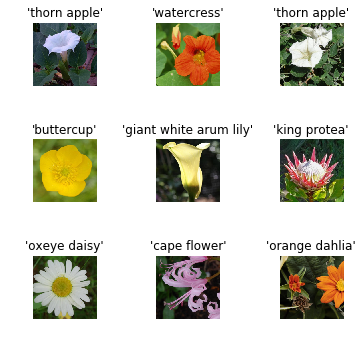

In [27]:
data.show_batch(rows=3, figsize=(5,5)) 

In [28]:
data.classes

['"colt\'s foot"',
 "'alpine sea holly'",
 "'anthurium'",
 "'artichoke'",
 "'azalea'",
 "'ball moss'",
 "'balloon flower'",
 "'barbeton daisy'",
 "'bearded iris'",
 "'bee balm'",
 "'bird of paradise'",
 "'bishop of llandaff'",
 "'black-eyed susan'",
 "'blackberry lily'",
 "'blanket flower'",
 "'bolero deep blue'",
 "'bougainvillea'",
 "'bromelia'",
 "'buttercup'",
 "'californian poppy'",
 "'camellia'",
 "'canna lily'",
 "'canterbury bells'",
 "'cape flower'",
 "'carnation'",
 "'cautleya spicata'",
 "'clematis'",
 "'columbine'",
 "'common dandelion'",
 "'corn poppy'",
 "'cyclamen '",
 "'daffodil'",
 "'desert-rose'",
 "'english marigold'",
 "'fire lily'",
 "'foxglove'",
 "'frangipani'",
 "'fritillary'",
 "'garden phlox'",
 "'gaura'",
 "'gazania'",
 "'geranium'",
 "'giant white arum lily'",
 "'globe thistle'",
 "'globe-flower'",
 "'grape hyacinth'",
 "'great masterwort'",
 "'hard-leaved pocket orchid'",
 "'hibiscus'",
 "'hippeastrum '",
 "'japanese anemone'",
 "'king protea'",
 "'lenten r

# Loading neural network and training using data

In [29]:
print(data.classes)
len(data.classes),data.c

['"colt\'s foot"', "'alpine sea holly'", "'anthurium'", "'artichoke'", "'azalea'", "'ball moss'", "'balloon flower'", "'barbeton daisy'", "'bearded iris'", "'bee balm'", "'bird of paradise'", "'bishop of llandaff'", "'black-eyed susan'", "'blackberry lily'", "'blanket flower'", "'bolero deep blue'", "'bougainvillea'", "'bromelia'", "'buttercup'", "'californian poppy'", "'camellia'", "'canna lily'", "'canterbury bells'", "'cape flower'", "'carnation'", "'cautleya spicata'", "'clematis'", "'columbine'", "'common dandelion'", "'corn poppy'", "'cyclamen '", "'daffodil'", "'desert-rose'", "'english marigold'", "'fire lily'", "'foxglove'", "'frangipani'", "'fritillary'", "'garden phlox'", "'gaura'", "'gazania'", "'geranium'", "'giant white arum lily'", "'globe thistle'", "'globe-flower'", "'grape hyacinth'", "'great masterwort'", "'hard-leaved pocket orchid'", "'hibiscus'", "'hippeastrum '", "'japanese anemone'", "'king protea'", "'lenten rose'", "'lotus'", "'love in the mist'", "'magnolia'"

(102, 102)

Using resnet 34 (no. of layers): very good at image classication, text review/sentiment, prediction (i.e: sales) and NLP

In [30]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 40386380.46it/s]


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.778705,0.515033,0.124302,03:22
1,0.574469,0.264886,0.061453,03:14
2,0.224888,0.192650,0.053073,03:16
3,0.121329,0.178241,0.051676,03:14


In [0]:
learn.save('stage-1')

# Reviewing the results

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

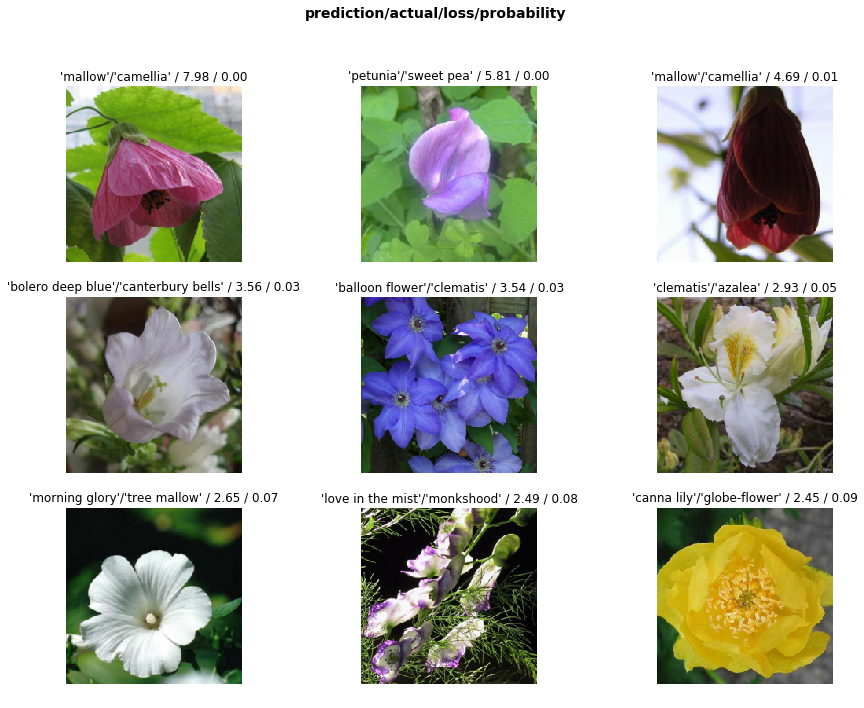

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

In [38]:
doc(interp.plot_top_losses)

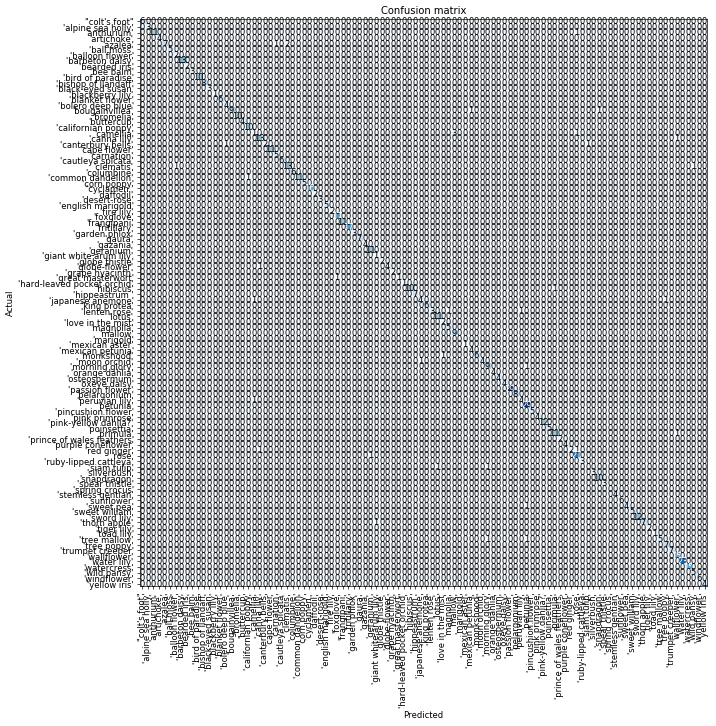

In [39]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [40]:
interp.most_confused(min_val=2)

[("'camellia'", "'mallow'", 3), ("'azalea'", "'clematis'", 2)]

# Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.419244,0.236693,0.062849,03:29


In [0]:
learn.load('stage-1');

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


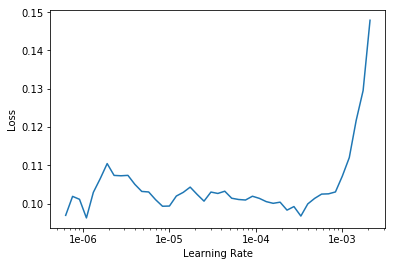

In [46]:
learn.recorder.plot()

In [48]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(4e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.089540,0.169743,0.048883,03:27
1,0.075475,0.145897,0.043296,03:26
2,0.054274,0.140046,0.041899,03:29
3,0.037608,0.128381,0.034916,03:29
4,0.033725,0.128022,0.034916,03:29


In [0]:
learn.save('stage-2')

In [0]:
#Saving the previous learner
learn.export()

# Infering new photos (photos taken in a park)

In [0]:
learn = load_learner(path)

(Category 'garden phlox',
 tensor(38),
 tensor([6.4405e-06, 2.7112e-05, 5.3033e-06, 2.1916e-04, 1.6612e-02, 1.0545e-03,
         3.0956e-04, 5.5846e-04, 1.0829e-03, 6.9734e-05, 1.6933e-04, 8.9413e-03,
         7.8331e-06, 4.6144e-05, 1.6389e-04, 3.0255e-05, 9.1764e-03, 2.7970e-04,
         4.6534e-05, 1.2470e-04, 1.5370e-03, 5.5223e-05, 2.5767e-03, 1.5797e-02,
         1.1042e-04, 7.5714e-04, 1.8353e-02, 2.4363e-02, 3.5245e-05, 1.5841e-05,
         3.9201e-04, 1.8306e-04, 1.7521e-02, 2.6257e-04, 3.5849e-04, 1.9329e-04,
         2.3537e-04, 4.5814e-05, 3.0340e-01, 3.1200e-02, 2.6030e-04, 2.3093e-03,
         1.0669e-05, 4.3547e-05, 1.6301e-05, 4.1536e-04, 7.9273e-04, 3.0214e-04,
         1.6364e-03, 1.9300e-03, 1.6656e-01, 2.0792e-04, 5.3833e-04, 4.2255e-03,
         5.8892e-04, 8.1579e-03, 3.7607e-04, 3.1742e-05, 7.1757e-03, 1.0462e-03,
         2.7238e-05, 6.0622e-04, 4.8811e-03, 3.9839e-04, 5.0069e-04, 2.9976e-05,
         2.2380e-04, 3.1079e-03, 6.2787e-04, 1.6212e-03, 3.1620e-04, 6

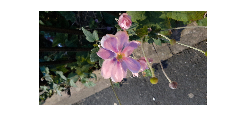

In [0]:
img = open_image('/content/drive/My Drive/fastai-v3/data/Lesson1/20190911_200125.jpg')
img.show()
learn.predict(img)